# DORY: An exploration of barge movements on Western-Europe waterways.

Western-Europe has a broad river delta reaching from the shores off the Netherlands and Belgium through Germany and France to the mountains of Switzerland. This river delta is used as a blue road for the transport of many types of goods like general goods in containers, commodities, cars, oil, mineral and gas. Although the barge is a slower transportation method than a truck or train, the amounts transported per barge, CO2 emissions per litre, the connection with deepsea transport and the reliability of infrastructure are all excellent arguments for shippers to choose the barge as transportation type.

In this exploration we'll dive into location data of barges to explore the speeds of barges. This information could be used to enhance estimations of arrival times which contributes to the reliability and therefore reputation of the transportation type.


## Exploratory analysis

During the exploratory analysis information was gathered about barge traveling speed in different location types. This information showed to important things.

1. Speeds of 0 km/ph influences the data a lot and should be removed if we would like to explore traveling speeds for beter estimations of arrival times. 
2. Waterway locations showed an interesting bimodal distribution worth exploring. What would cause this and how should it be taken in considiration for calculating estimated arrival times.

The exploration of barge behavior on waterways led to a analysis of the correlation between speed and barge size. And the correlation between speed and course of barge.

Based on the data the choice was made to use barge length as measurement for size. The analysis showed a correlation between speed and size. Generally speaking the larger the barge, the faster the average speed of the barge. The speed analysis based on the size of the barges also showed the bimodal distribution.

The course as is wasn't suited for visual exploration. Therefore the data was enriched with compass headings. This showed a clear difference in speed between barges heading south to west and barges heading north to east.

The visual exploration led to plot the locations of barges on a map to get a general idea of the positions of the waterways. The sea ports are North to West of the locations, meaning barges sail upstream when heading south to east. This could explain the difference in speed. Also an important fact could be that barge mainly transport import cargo, meaning traveling full south to east and empty north to west.

Conclusion of the exploration: The visual exploration has shown multiple relevant data points that could be used for calculation an estimated arrival time, but further research is needed. 



In [1]:
cd \users\frank\jupyter notebook\logistics\data

C:\users\frank\jupyter notebook\logistics\data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Frank\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
bp = pd.read_csv('Ubargepositionapril.csv')

## The Data

The data is collected from barge positions in the Western-Europe delta. Positions consists of speed, course and location. The data is combined with barge and location information. 

Barge information consists of the cargo capacity a barge can carry in tonnage. The dimensions of a barge are measured in length and width in meters.

For the location the data gives information about the type of location, code of a location, position in latitude, longitude and geofence. 
In this study the location types ports, waterways and terminals are used. Other obvious location types would be bridges and docks. Those aren't taken under consideration because the greatest impact these locations types have on the estimated time of arrival isn't based on the traveling speed of the barge, but their waiting times. 

Because we're interested in the traveling speed of barges the data points with a speed of 0 km/ph are dropped from the dataset.


In [4]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420796 entries, 0 to 420795
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   shipid           420796 non-null  int64  
 1   speed            420796 non-null  float64
 2   course           420796 non-null  float64
 3   location         420796 non-null  object 
 4   code             181408 non-null  object 
 5   type             420796 non-null  object 
 6   latitude         260324 non-null  float64
 7   longitude        260324 non-null  float64
 8   encodedpolyline  361753 non-null  object 
 9   capacityton      420796 non-null  int64  
 10  length_m         420796 non-null  float64
 11  width_m          420796 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 38.5+ MB


In [5]:
# Create list for new dataframe

count_type = bp['type'].value_counts()
top_type = count_type > 50000
top_type = top_type[top_type == True]
lst_type = np.array(top_type.index)
lst_type

array(['Port', 'Water way', 'Terminal'], dtype=object)

In [6]:
# Create copy for new dataframe

bp_sub1 = bp[bp['type'].isin(lst_type)].copy()
bp_sub1['type'].value_counts()

Port         243752
Water way    106166
Terminal      69564
Name: type, dtype: int64

In [7]:
# Drop row with speed of 0 such that we're able to read the data beter

bp_sub2 = bp_sub1[bp_sub1['speed'] >= 1]

## Location type effects the speed of barges.

There is a clear and obvious difference in speed between the three types of locations.

In ports vessels seem to have an normal distribution. This seems to be obvious behavior. Ports are passed through or sailed for a period of time before arriving at a destination.

On waterways we clearly see a bimodal distribution. This is odd. Why would we witness this? What would influence the speed in this way?

For terminals the distribution leans towards a uniform distribution, although a speed between 12 and 19 km/ph stands out. Because the purpose of a terminal is to dock barges, it's logical that lower speeds are more common. Barges should slow down and start up when mooring or unmooring. The peaks would suggest the sailing past a terminal is a common activity.

The location also have great similarities. The peak speeds are between 15 and 20 km/ph and top speed don't seem to be more than 25 km/ph in most cases.

Because of the differences between the location types, only traveling speeds on waterways will be taken in consideration for further explanation. This type seems the most suited for explaining traveling speeds.


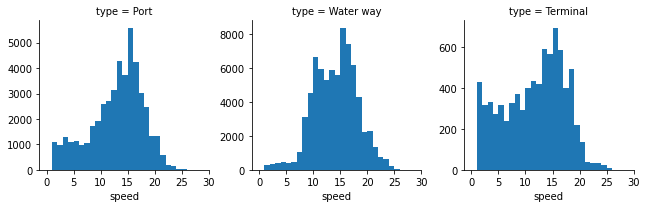

In [8]:
# Create bin criteria
bin_edges = np.arange(0,bp['speed'].max()+1,1)

# Create bin criteria
g = sb.FacetGrid(data = bp_sub2, col = 'type', col_wrap = 3, sharey = False)

# Plot histogram
g.map(plt.hist, 'speed', bins=bin_edges)
x_ticks = 0,5,10,15,20,25,30
g.set(xticks = x_ticks);

## The barge capacity seems to have a positive effect on traveling speed.

The data seems to show a positive relation between speed and the capacity cargo a barge can load measured in tonnage. The conclusion could be: The more capacity, the faster a barge. However correlation doesn't mean causation. Perhaps it's true. Perhaps the capacity is allocated on different waterways which could also influence the speed.

In [9]:
# trim data to only water way movements
bp_ways = bp_sub2[bp_sub2['type'] == 'Water way'].copy()

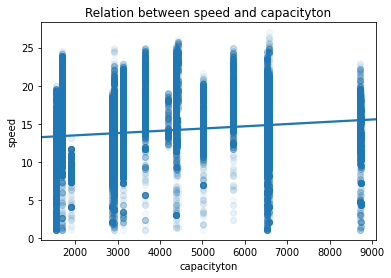

In [10]:
# Plot on capacityton
sb.regplot(data = bp_ways, x = 'capacityton', y = 'speed', scatter_kws = {'alpha': 0.05})
plt.title('Relation between speed and capacityton');

## Also the length of a barge seems to have a positive effect on traveling speed.

The visualisation clearly shows that the more length the barge has the faster it's average speed. The second smallest barge (86m in length) are an important exception. These are on average the 'fastest' barges. Barges with a length of 99m clearly show the displacement of the bimodal distribution. Other barge lengths, except for the 85m barges, also show a bimodal figure.

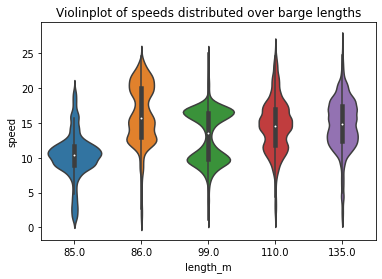

In [11]:
sb.violinplot(data = bp_ways, x = 'length_m', y = 'speed')
plt.title("Violinplot of speeds distributed over barge lengths");

In [12]:
# Create compass heading
heading = []

for i in bp_ways['course']:
    if i < 22.5:
        heading.append('North')        
    elif i < 67.5:
        heading.append('North East')
    elif i < 112.5:
        heading.append('East')
    elif i < 157.5:
        heading.append('South East')
    elif i < 202.5:
        heading.append('South')
    elif i < 247.5:
        heading.append('South West')
    elif i < 292.5:
        heading.append('West')
    elif i < 337.5:
        heading.append('North West')
    elif i < 360:
        heading.append('North')
    else:
        heading.append('Unkown')
        
heading = np.array(heading)

In [13]:
# Add compass heading to dataframe
bp_ways['heading'] = heading

In [14]:
# Check if code works
bp_ways.groupby(['heading']).speed.mean()

heading
East          13.814845
North         14.278776
North East    14.707845
North West    16.229699
South         11.775080
South East    13.138188
South West    13.198343
West          16.001656
Name: speed, dtype: float64

In [15]:
# Order heading logically from North, East, South, West 
headingOrder = ['North', 'North East', 'East', 'South East', 'South', 'South West', 'West', 'North West']
compassHeadings = pd.api.types.CategoricalDtype(ordered = True, categories=headingOrder)
bp_ways['heading'] = bp_ways['heading'].astype(compassHeadings)

## The heading of a barge seems to effect its speed.

It seems that the heading of a barge has an effect on the speed of the barge. Heading South, South West or South East will affect the speed in a negative way and heading West or North West will affect the speed in a positive way.

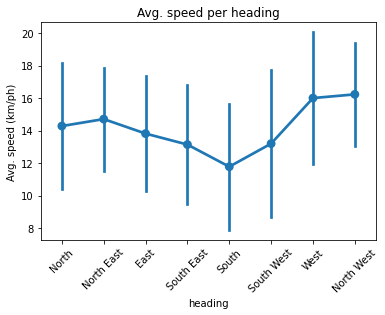

In [16]:
# Plot average speeds and standard deviations
sb.pointplot(data = bp_ways, x= 'heading', y='speed', ci = 'sd')
plt.xticks(rotation = 45)
plt.ylabel('Avg. speed (km/ph)')
plt.title('Avg. speed per heading');

## 99 meter barges underline the effect of heading on speed.

The barges of 99 meters makes the difference in average speed very clear. Barges heading South, South East, East and South West will, on average, travel with a slower speed that barges heading North, North East, North West or West. This corresponds with the bimodal distribution of this size of barge.


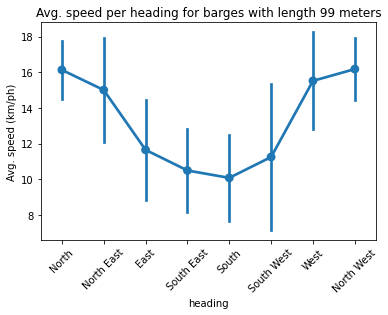

In [17]:
# Plot average speeds and standard deviations
barges_99m = bp_ways[bp_ways['length_m'] == 99.00]
sb.pointplot(data = barges_99m, x= 'heading', y='speed', ci = 'sd')
plt.xticks(rotation = 45)
plt.ylabel('Avg. speed (km/ph)')
plt.title('Avg. speed per heading for barges with length 99 meters');

# Plot on map
Let's explore the barge positions on a map relative to the headings to figure out what could be the cause of the discrepancy.

In [18]:
from arcgis.gis import GIS


C:\Users\Frank\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [19]:
import descartes
import geopandas as gpd
import polyline as pol
from shapely.geometry import Point, Polygon

In [20]:
gis = GIS()

The heading of 85 meter barges. These barges don't show a bimodal speed distribution and have the lowest average.

In [21]:
loc_barges_85m = gis.map("Netherlands")
slct_85 = bp_ways[bp_ways['length_m'] == 85.00][['location','latitude','longitude']]
slct_85 = slct_85.drop_duplicates()
lyr_85 = gis.content.import_data(slct_85)
loc_barges_85m.add_layer(lyr_85)
loc_barges_85m

MapView(layout=Layout(height='400px', width='100%'))

The heading of 86 meter barges. These barges show a slight bimodal speed distribution and have the highest average speed.

In [22]:
loc_barges_86m = gis.map("Netherlands")
slct_86 = bp_ways[bp_ways['length_m'] == 86.00][['location','latitude','longitude']]
slct_86 = slct_86.drop_duplicates()
lyr_86 = gis.content.import_data(slct_86)
loc_barges_86m.add_layer(lyr_86)
loc_barges_86m

MapView(layout=Layout(height='400px', width='100%'))

The heading of 99 meter barges. These barges show a clear bimodal speed distribution.

In [23]:
loc_barges_99m = gis.map("Netherlands")
slct_99 = bp_ways[bp_ways['length_m'] == 99.00][['location','latitude','longitude']]
slct_99 = slct_99.drop_duplicates()
lyr_99 = gis.content.import_data(slct_99)
loc_barges_99m.add_layer(lyr_99)
loc_barges_99m

MapView(layout=Layout(height='400px', width='100%'))

The heading of 110 meter barges. These barges show a slight bimodal speed distribution.

In [24]:
loc_barges_110m = gis.map("Netherlands")
slct_110 = bp_ways[bp_ways['length_m'] == 110.00][['location','latitude','longitude']]
slct_110 = slct_110.drop_duplicates()
lyr_110 = gis.content.import_data(slct_110)
loc_barges_110m.add_layer(lyr_110)
loc_barges_110m

MapView(layout=Layout(height='400px', width='100%'))

The heading of 110 meter barges. These barges show a slight bimodal speed distribution.

In [25]:
loc_barges_135m = gis.map("Netherlands")
slct_135 = bp_ways[bp_ways['length_m'] == 135.00][['location','latitude','longitude']]
slct_135 = slct_135.drop_duplicates()
lyr_135 = gis.content.import_data(slct_135)
loc_barges_135m.add_layer(lyr_135)
loc_barges_135m

MapView(layout=Layout(height='400px', width='100%'))

It seems like all the barge of 99 meters travel in the same area's as those of 110 and 135 meters. We also notice that heading east, south and south east are inland routes, meaning going against the current. This could be the reason why heading this way is slower than heading north, west or north west. Another reason could be the load of the barges. This area is leans heavily on import. Barges travel full inland and empty towards sea ports.

# Conclusion.

This study is focussed on location data of barges to explore their speeds. This information could be used to enhance estimations of arrival times which contributes to the reliability and therefore reputation of the transportation type.

Based on the data we can advise to further explore the effect of vessel size and sailing directions on the calculation of estimated arrival times of barges traveling over the main rivers of the Western-Europe delta. 

The data clearly shows that barges heading North, North West and West over these rivers are faster than in other directions. Heading North, North West and West in this case means sailing toward sea ports and with the current. This could cause the difference in speed. Another possibility could be the cargo distribution. Western-Europe is mainly focussed on import of cargo, meaning barges are full sailing inland and empty sailing towards the sea ports. Further analysis is needed to research these possibilities. 

Why cargo capacity and length seem to have effect on the speed of a barge remains unclear. More information should be gathered about the routes of the barges. Does 99 meter barges have more short runs than long hauls compared to the other barges? And if so could this effect the average speed or speed distribution?


